# Importing The Data

In [1]:
import pandas as pd
#for manupulating the data
import matplotlib.pyplot as plt
#for making plots
from matplotlib import style
style.use('ggplot')
%matplotlib inline
# to make the graphs better  This creates the grid ike structures present in the background
#So that matplotlib is attached to Jupyter


import plotly
#this is also a visualization library it has 3 parts
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
#as go as it will be use d in object oriented way


import cufflinks as cf
#cufflink binds pandas and plotly
from plotly.offline import init_notebook_mode, plot, iplot

import folium
#this is imported so as to get the map visualization 

In [2]:
#To conncect plotly to jupyter notebook
pyo.init_notebook_mode(connected=True)
cf.go_offline()

# Reading The Files

In [3]:
#this is how to read excel files


# www.mohfw.gov.in   ON 6/5/2020
df=pd.read_excel(r"D:\CV\Projects present in CV\Covid19 visualisation\COVID-19-Data-Analyisis-master/Covid_cases_in_India.xlsx")

#latitude and longitude of Indian States
loc=pd.read_excel(r"D:\CV\Projects present in CV\Covid19 visualisation\COVID-19-Data-Analyisis-master/Indian Coordinates.xlsx")


#This is how we import 1 excel sheet from the data
#initaial reading of countries
ana_ind=pd.read_excel(r"D:\CV\Projects present in CV\Covid19 visualisation\COVID-19-Data-Analyisis-master/per_day_cases.xlsx",sheet_name="India")
ana_ita=pd.read_excel(r"D:\CV\Projects present in CV\Covid19 visualisation\COVID-19-Data-Analyisis-master/per_day_cases.xlsx",sheet_name="Italy")
ana_usa=pd.read_excel(r"D:\CV\Projects present in CV\Covid19 visualisation\COVID-19-Data-Analyisis-master/per_day_cases.xlsx",sheet_name="Usa")
ana_chi=pd.read_excel(r"D:\CV\Projects present in CV\Covid19 visualisation\COVID-19-Data-Analyisis-master/per_day_cases.xlsx",sheet_name="China")
ana_jap=pd.read_excel(r"D:\CV\Projects present in CV\Covid19 visualisation\COVID-19-Data-Analyisis-master/per_day_cases.xlsx",sheet_name="Japan")
ana_spa=pd.read_excel(r"D:\CV\Projects present in CV\Covid19 visualisation\COVID-19-Data-Analyisis-master/per_day_cases.xlsx",sheet_name="Spain")
ana_isr=pd.read_excel(r"D:\CV\Projects present in CV\Covid19 visualisation\COVID-19-Data-Analyisis-master/per_day_cases.xlsx",sheet_name="Israel")



dd=pd.read_excel(r"D:\CV\Projects present in CV\Covid19 visualisation/covid_19_clean_complete.xlsx",sheet_name="Sheet1")

# Data Cleaning

In [4]:
df.head(2)

S. No.           Name of State / UT  Total Confirmed cases  Cured  Death
0       1  Andaman and Nicobar Islands                     33     32      0
1       2               Andhra Pradesh                   1717    589     36

In [5]:
#drop function is applied
#inplace is TRUE to drop it permanently
#axis =1 to select SNO from columns
df.drop(['S. No.'], axis=1, inplace=True)

In [6]:
df["Active Cases"]=df["Total Confirmed cases"]-df["Cured"]-df["Death"]

#moving column from 2 to 3

col_name="Total Confirmed cases"
first_col = df.pop(col_name)
df.insert(3, col_name, first_col)
df.head(2)

Name of State / UT  Cured  Death  Total Confirmed cases  \
0  Andaman and Nicobar Islands     32      0                     33   
1               Andhra Pradesh    589     36                   1717   

   Active Cases  
0             1  
1          1092

# Analysis

In [7]:
df.head(2)

Name of State / UT  Cured  Death  Total Confirmed cases  \
0  Andaman and Nicobar Islands     32      0                     33   
1               Andhra Pradesh    589     36                   1717   

   Active Cases  
0             1  
1          1092

In [8]:
#TO get a subset dataframe of 2 columns
k=df.loc[:,['Name of State / UT','Active Cases']]

In [9]:
loc.head(2)

Name of State / UT   Latitude  Longitude
0  Andaman and Nicobar Islands  11.667026  92.735983
1               Andhra Pradesh  14.750429  78.570026

In [10]:
#to merge the two data sets
full=pd.merge(loc,df,  on='Name of State / UT' )
full.head(2)

Name of State / UT   Latitude  Longitude  Cured  Death  \
0  Andaman and Nicobar Islands  11.667026  92.735983     32      0   
1               Andhra Pradesh  14.750429  78.570026    589     36   

   Total Confirmed cases  Active Cases  
0                     33             1  
1                   1717          1092

In [11]:
ana_chi=ana_chi.groupby('Date').sum()
ana_chi

Latitude  Longitude  Confirmed  Deaths  Recovered
Date                                                          
2020-01-22  1083.3367  3684.4197        548      17         28
2020-01-23  1083.3367  3684.4197        643      18         30
2020-01-24  1083.3367  3684.4197        920      26         35
2020-01-25  1083.3367  3684.4197       1406      42         38
2020-01-26  1083.3367  3684.4197       2075      56         48
...               ...        ...        ...     ...        ...
2020-05-02  1083.3367  3684.4197      83959    4637      75935
2020-05-03  1083.3367  3684.4197      83964    4637      75977
2020-05-04  1083.3367  3684.4197      83966    4637      76019
2020-05-05  1083.3367  3684.4197      83968    4637      76057
2020-05-06  1083.3367  3684.4197      83970    4637      76081

[106 rows x 5 columns]

# Visualisation

In [12]:
#Conditional formatting of the data

df.style.background_gradient(cmap='Reds')

In [13]:
#sort descending order
k=k.sort_values(by=['Active Cases'],ascending=False)

k.style.background_gradient(cmap='Reds')

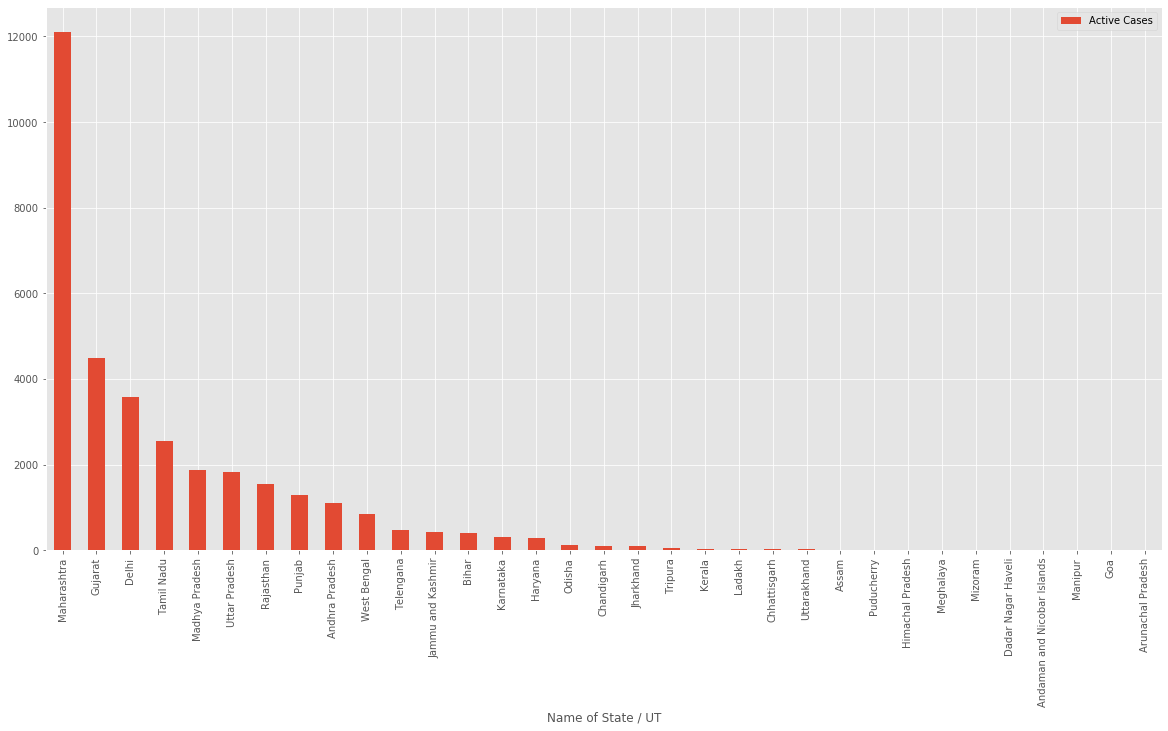

In [14]:
#to plot the bargraph USING PANDAS VISUALISATION

k.plot(kind='bar',figsize=(20, 10),x='Name of State / UT',y='Active Cases')

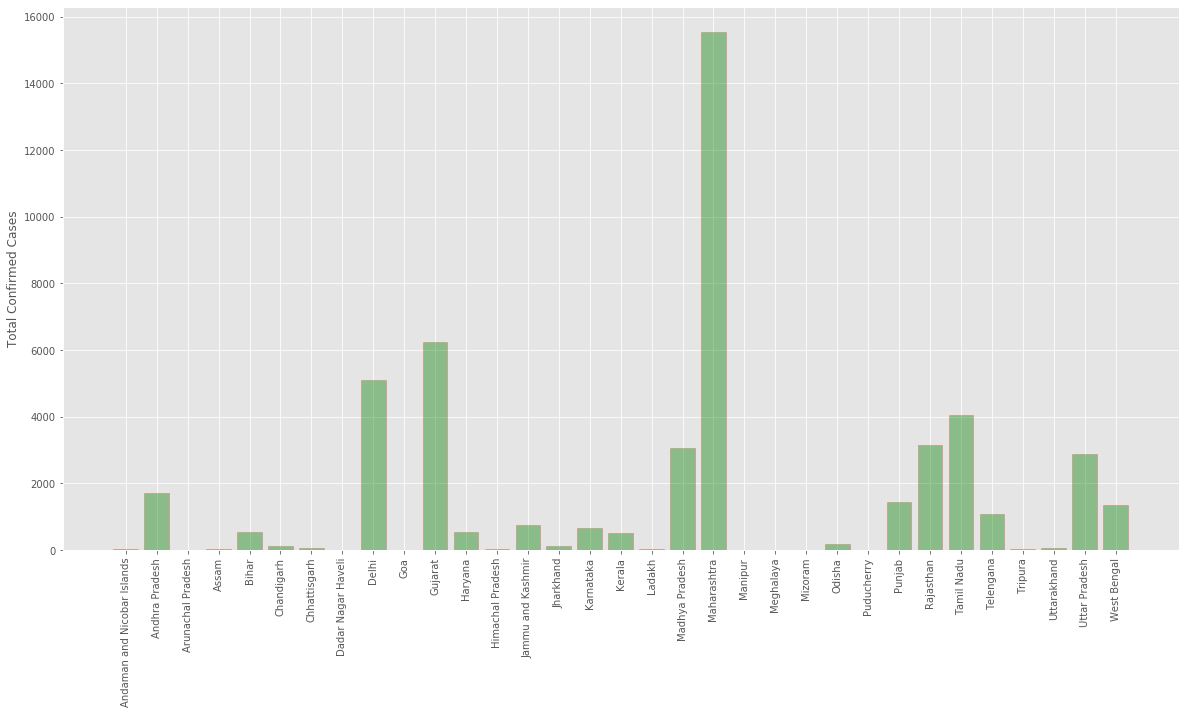

In [15]:
#TO USE MATPLOTLIB VISUALISATION
plt.figure(figsize=(20, 10))
plt.bar(df['Name of State / UT'],df['Total Confirmed cases'], color='g', alpha=0.4, edgecolor='red')
plt.ylabel("Total Confirmed Cases")
plt.xticks(rotation='vertical')
plt.show()

In [16]:
#plotly
df.iplot(kind='bar',x='Name of State / UT')

In [17]:
#using plotly express
px.bar(df, x='Name of State / UT',y='Cured')

In [18]:
#using Pandas
#df.plot(kind='scatter', x='Name of State / UT',y='Cured',figsize=(20, 8))

#cant plot

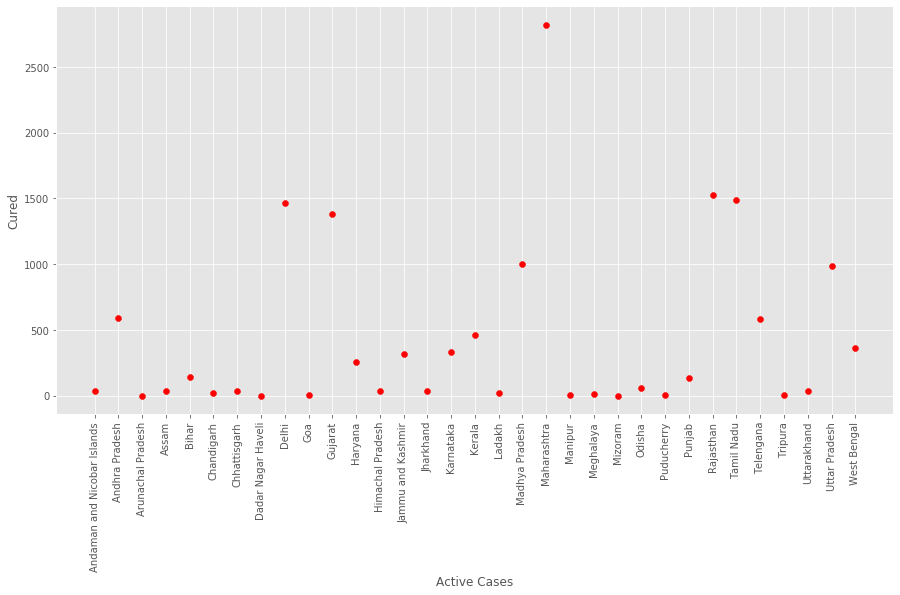

In [19]:
#using matplotlib
plt.figure(figsize=(15, 7.5))
plt.scatter(df['Name of State / UT'],df['Cured'], color='r', alpha=1, edgecolor='red')
plt.xticks(rotation='vertical')
plt.xlabel("Active Cases")
plt.ylabel("Cured")
plt.show()

In [20]:
#this is really great with lot of features


#using Plotly
df.iplot(kind='scatter', x='Name of State / UT',y='Cured',xTitle="States/UT",yTitle="Cured", mode='markers+lines',color='red',size=15)

In [21]:
px.scatter(df, x='Name of State / UT',y='Total Confirmed cases')

In [22]:
full.head(2)

Name of State / UT   Latitude  Longitude  Cured  Death  \
0  Andaman and Nicobar Islands  11.667026  92.735983     32      0   
1               Andhra Pradesh  14.750429  78.570026    589     36   

   Total Confirmed cases  Active Cases  
0                     33             1  
1                   1717          1092

In [23]:
#to get the map of india 
#zoom_start will show the map at a particular range
#stamenterrain is 1 ofthe different types of graphs folium can produce


map=folium.Map(location=[20,70],zoom_start=1,tiles='Stamenterrain')


for lat,lon,value,name in zip(full['Latitude'],full['Longitude'],full['Total Confirmed cases'],full['Name of State / UT']):
    folium.CircleMarker([lat,lon],radius=value*0.003, popup=('<strong>State</strong>:'+str(name).capitalize()+'<br>''<strong>Total_Cases</strong>:'+str(value)+'</br>' ), color='red', fill_color='red',fill_opacity=0.2).add_to(map)

    
map

In [24]:
ana_ind.head()

Country  Latitude  Longitude       Date  Confirmed  Deaths  Recovered
0   India        21         78 2020-01-22          0       0          0
1   India        21         78 2020-01-23          0       0          0
2   India        21         78 2020-01-24          0       0          0
3   India        21         78 2020-01-25          0       0          0
4   India        21         78 2020-01-26          0       0          0

Text(0.5, 1.0, 'Confirmed Cases in India')

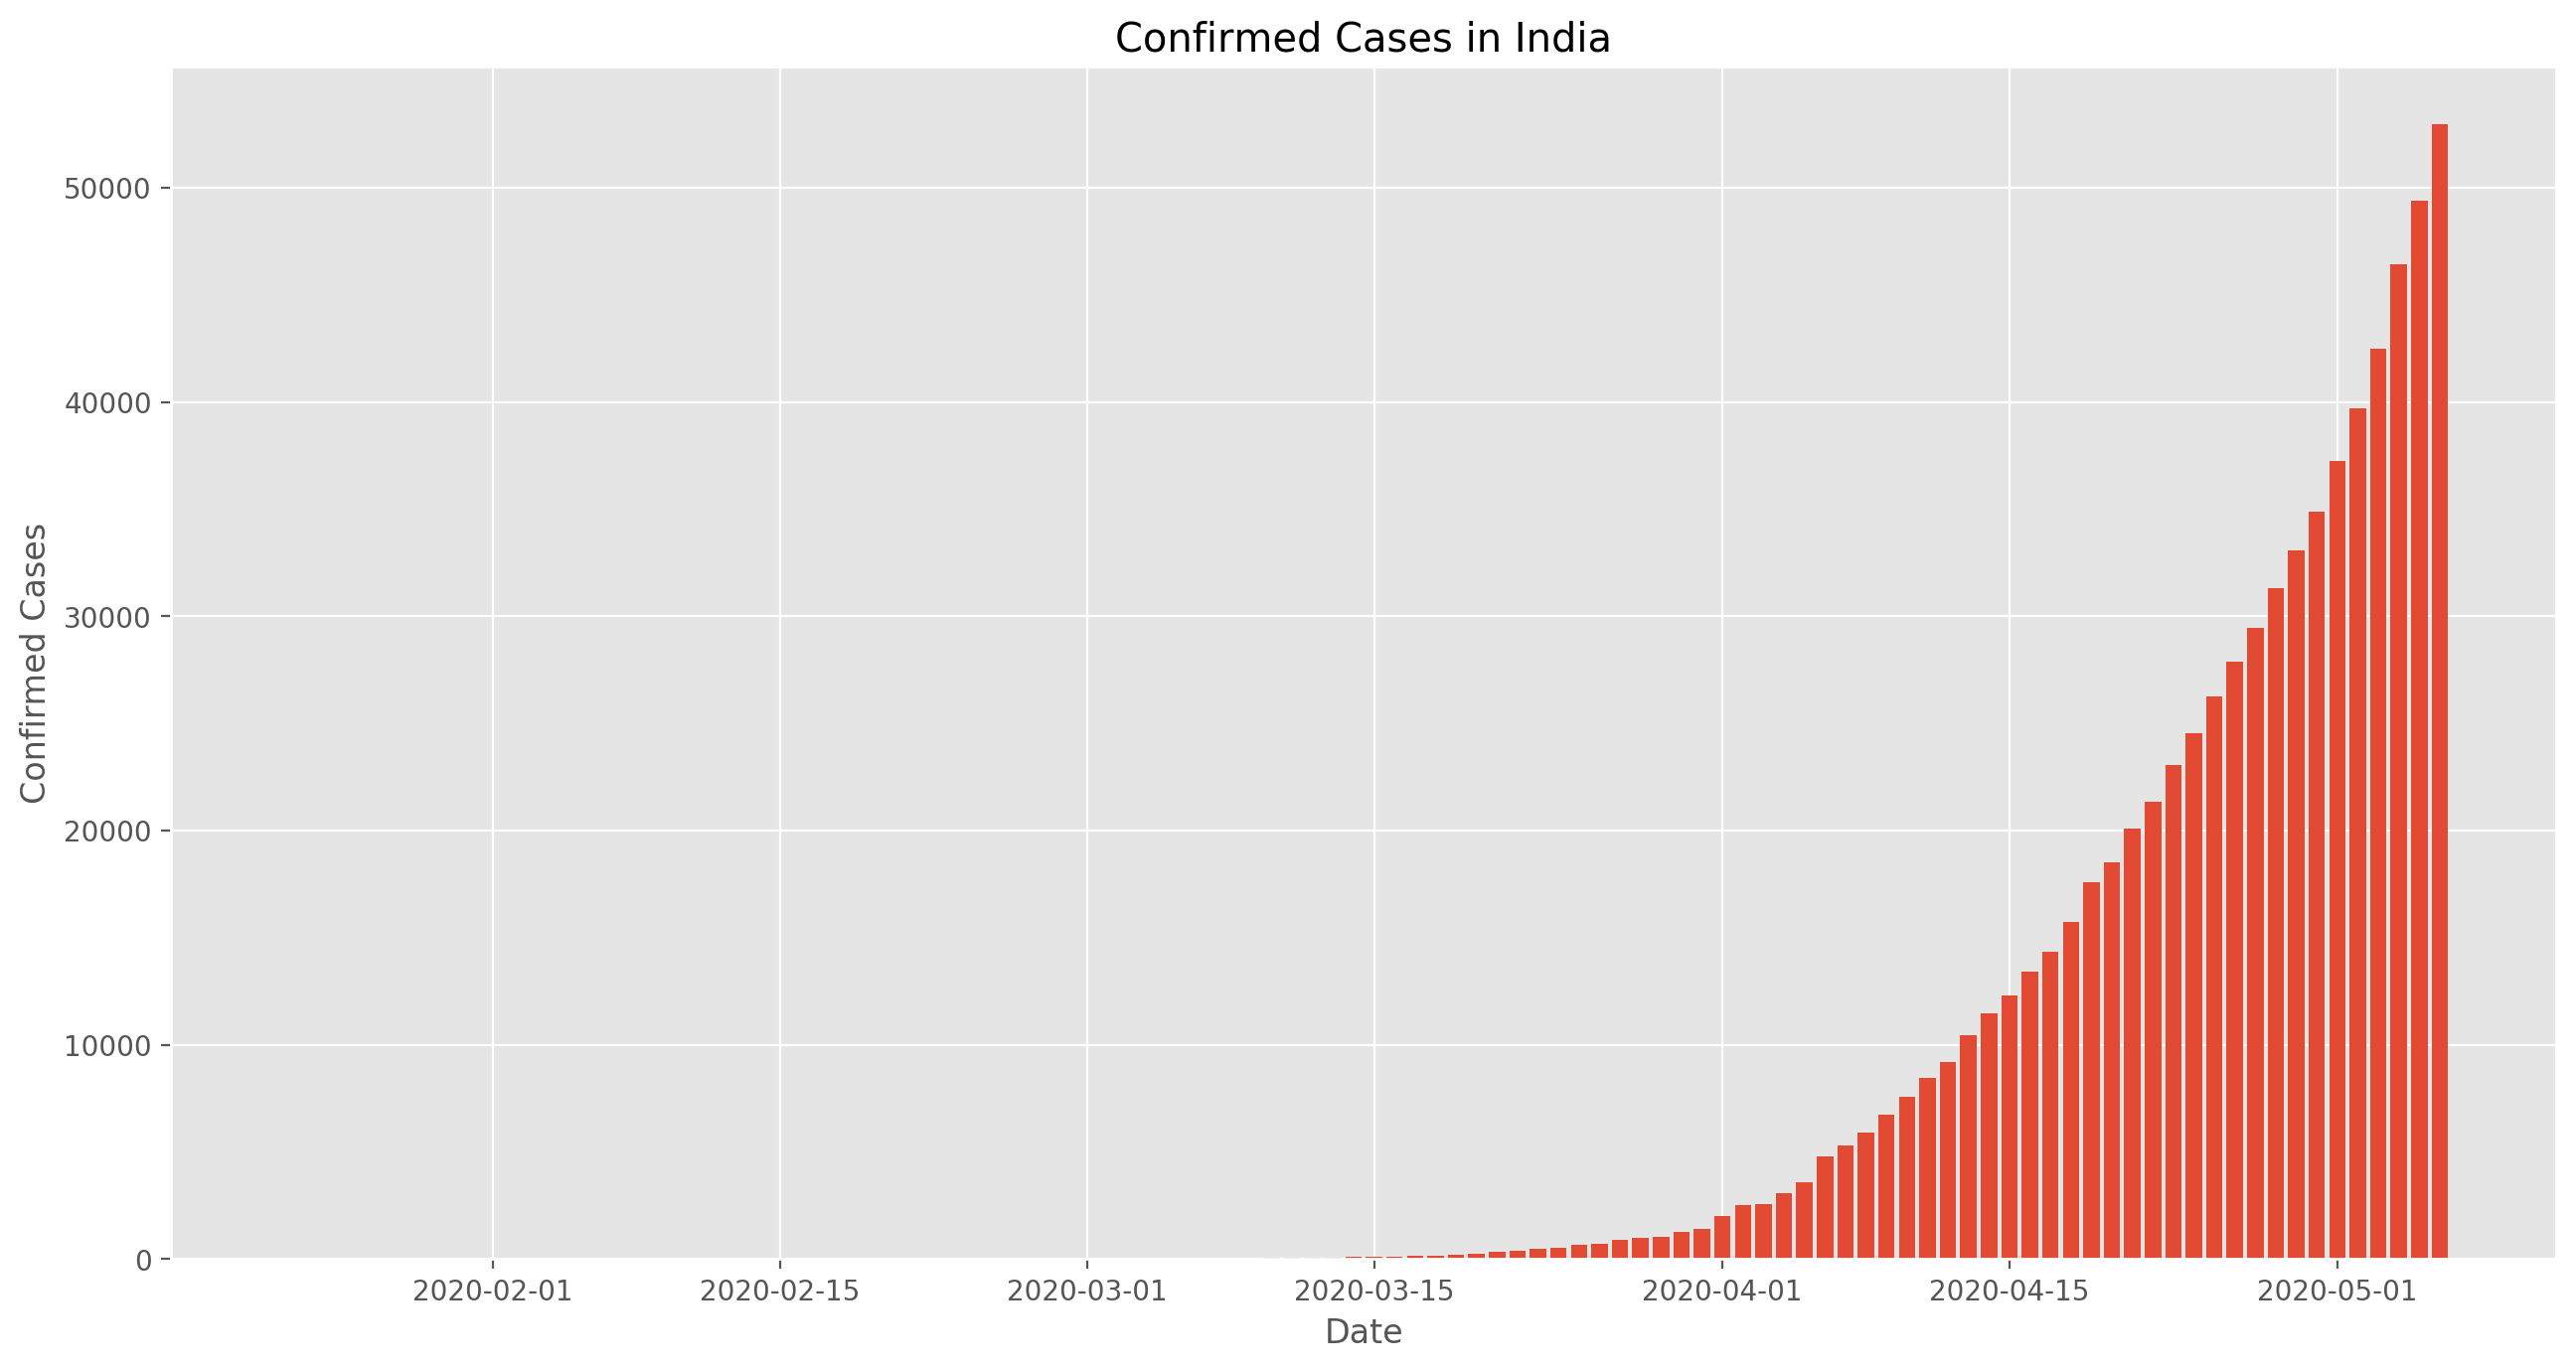

In [25]:
#Using matplotlib to visualize the data
#first we will define and set axes


fig=plt.figure(figsize=(15,7.5),dpi=200)
axes=fig.add_axes([0.4,0.4,0.8,0.8])
axes.bar(ana_ind["Date"],ana_ind["Confirmed"])
axes.set_xlabel("Date")
axes.set_ylabel("Confirmed Cases")
axes.set_title("Confirmed Cases in India")

In [26]:
#plotly
px.bar(ana_ind,x='Date',y='Confirmed',color='Confirmed',title='Confirmed Cases India')

In [27]:
px.bar(ana_usa,x='Date',y='Confirmed',color='Confirmed',title='Confirmed Cases in USA')

In [28]:
px.bar(ana_chi,y='Confirmed',color='Confirmed',title='Confirmed Cases China')

In [29]:
px.bar(ana_ita,x='Date',y='Confirmed',color='Confirmed',title='Confirmed Cases in Italy')

In [30]:
px.bar(ana_spa,x='Date',y='Confirmed',color='Confirmed',title='Confirmed Cases in Spain')

In [31]:
px.bar(ana_isr,x='Date',y='Confirmed',color='Confirmed',title='Confirmed Cases in Israel')

In [32]:
px.bar(ana_jap,x='Date',y='Confirmed',color='Confirmed',title='Confirmed Cases in Japan')

# Subplots

In [33]:
#subplots using bar graphs
from plotly.subplots import make_subplots

#we are making formats
fig= make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y": True},{"secondary_y": True}],[{"secondary_y": True},{"secondary_y": True}]],
    subplot_titles=("India","Italy","USA","Spain"))

#this is for uploading the graphs
fig.add_trace(go.Bar(x=ana_ind['Date'],y=ana_ind['Confirmed'], 
                     marker=dict(color=ana_ind['Confirmed'], coloraxis="coloraxis")),1,1)
fig.add_trace(go.Bar(x=ana_ita['Date'],y=ana_ita['Confirmed'], 
                     marker=dict(color=ana_ita['Confirmed'], coloraxis="coloraxis")),1,2)
fig.add_trace(go.Bar(x=ana_usa['Date'],y=ana_usa['Confirmed'], 
                     marker=dict(color=ana_usa['Confirmed'], coloraxis="coloraxis")),2,1)
fig.add_trace(go.Bar(x=ana_spa['Date'],y=ana_spa['Confirmed'],
                     marker=dict(color=ana_spa['Confirmed'], coloraxis="coloraxis")),2,2)



#layout update
#to change colors
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Confirmed Cases")
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

# World Covid19

In [48]:
#to change the column heading names
dd.rename(columns={'Country/Region':'Country'},inplace=True)

In [77]:
#THIS IS NOT WORKING
dd['Date'] = dd['Date'].dt.strftime('%Y-%m-%d')

In [78]:
Nan_df=dd[dd.isna().any(axis=1)]
Nan_df["Province/State"]=Nan_df["Country"]
Nan_df

Province/State                Country        Lat        Long  \
0                      China                  China  31.825700  117.226400   
1                      China                  China  40.182400  116.414200   
2                      China                  China  30.057200  107.874000   
3                      China                  China  26.078900  117.987400   
4                      China                  China  23.341700  113.424400   
...                      ...                    ...        ...         ...   
17788         Western Sahara         Western Sahara  24.215500  -12.885800   
17789  Sao Tome and Principe  Sao Tome and Principe   0.186360    6.613081   
17790                  Yemen                  Yemen  15.552727   48.516388   
17791                Comoros                Comoros -11.645500   43.333300   
17792             Tajikistan             Tajikistan  38.861034   71.276093   

             Date  Confirmed  Deaths  Recovered  
0      2020-01-22          1       0          0  
1      2020-01-22         14       0          0  
2      2020-01-22          6       0          0  
3      2020-01-22          1       0          0  
4      2020-01-22         26       0          0  
...           ...        ...     ...        ...  
17788  2020-05-06          6       0          5  
17789  2020-05-06        174       3          4  
17790  2020-05-06         25       5          0  
17791  2020-05-06          8       1          0  
17792  2020-05-06        379       8          0  

[17793 rows x 8 columns]

In [79]:
dd

Province/State                Country        Lat        Long  \
0                NaN                  China  31.825700  117.226400   
1                NaN                  China  40.182400  116.414200   
2                NaN                  China  30.057200  107.874000   
3                NaN                  China  26.078900  117.987400   
4                NaN                  China  23.341700  113.424400   
...              ...                    ...        ...         ...   
17788            NaN         Western Sahara  24.215500  -12.885800   
17789            NaN  Sao Tome and Principe   0.186360    6.613081   
17790            NaN                  Yemen  15.552727   48.516388   
17791            NaN                Comoros -11.645500   43.333300   
17792            NaN             Tajikistan  38.861034   71.276093   

             Date  Confirmed  Deaths  Recovered  
0      2020-01-22          1       0          0  
1      2020-01-22         14       0          0  
2      2020-01-22          6       0          0  
3      2020-01-22          1       0          0  
4      2020-01-22         26       0          0  
...           ...        ...     ...        ...  
17788  2020-05-06          6       0          5  
17789  2020-05-06        174       3          4  
17790  2020-05-06         25       5          0  
17791  2020-05-06          8       1          0  
17792  2020-05-06        379       8          0  

[17793 rows x 8 columns]

In [85]:
fig=px.density_mapbox(dd,lat="Lat",lon="Long",hover_name="Country",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title="Worldwide CoVid19")
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"b":0,"l":0})